In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptops-price-dataset/laptops.csv


### Reading the data

In [33]:
df = pd.read_csv("/kaggle/input/laptops-price-dataset/laptops.csv")
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [34]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [35]:
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [36]:
cols = ['ram', 'storage','screen', 'final_price']
df = df[cols]
df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='final_price', ylabel='Density'>

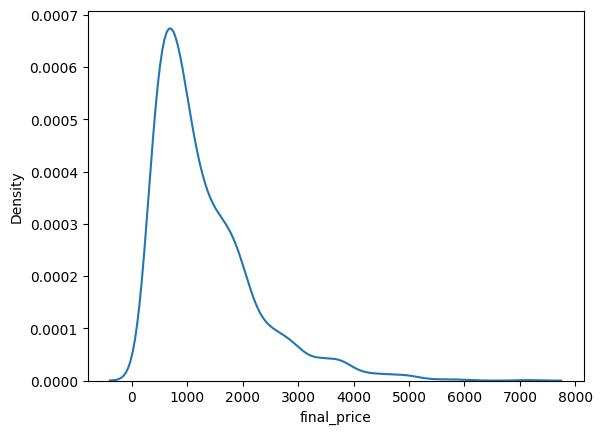

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.kdeplot(df.final_price)

### Median Value of RAM

In [38]:
df.describe().loc["50%", "ram"]

16.0

In [39]:
n = len(df)
n_train = int(0.6*n)
n_val = int(0.2*n)
n_test = n - n_train - n_val

In [40]:
np.random.seed(42)
idx = np.arange(n)
np.random.shuffle(idx)

In [41]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [42]:
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [43]:
df_train.head()

,ram,storage,screen,final_price
0,32,1000,15.6,1123.29
1,4,64,14.1,201.05
2,32,1000,14.0,997.74
3,16,512,13.3,1016.00
4,32,1000,16.0,2739.00


### Columns with missing values

In [44]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [45]:
df_train.isnull().sum()

ram            0
storage        0
screen         3
final_price    0
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='final_price', ylabel='Count'>

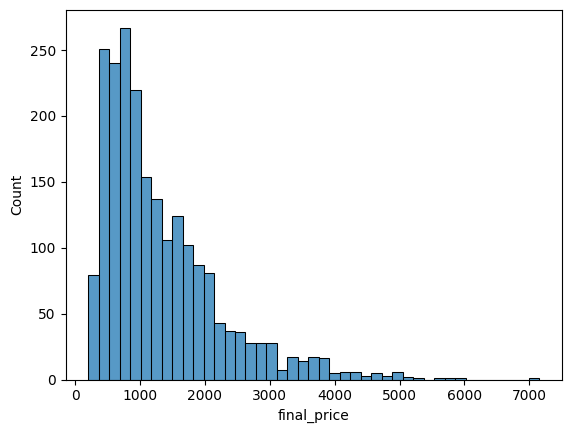

In [46]:
sns.histplot(df.final_price)

## Question 3

In [47]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [48]:
y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

In [49]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

X_train = df_train.fillna(0).values
w0, w = train_linear_regression(X_train, y_train)

X_val = df_val.fillna(0).values
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.4288635315474416

In [50]:
X_train_with_mean = df_train.fillna(df_train.mean()).values
w0, w = train_linear_regression(X_train_with_mean, y_train)

X_val_with_mean = df_val.fillna(df_train.mean()).values
y_pred_with_mean = w0 + X_val_with_mean.dot(w)

rmse(y_val, y_pred_with_mean)

0.4311767801693919

Filling with mean and filling with zeros give almost equal results.

## Question 4

In [51]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

result = dict()
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = df_train.fillna(0).values
    w0, w = train_linear_regression_reg(X_train, y_train, r)

    X_val = df_val.fillna(0).values
    y_pred = w0 + X_val.dot(w)
    result[r] = rmse(y_val, y_pred)
    
print(result)

{0: 0.4288635315474416, 0.01: 0.4288516360534088, 0.1: 0.42877560097076456, 1: 0.4305932989743414, 5: 0.4632095257580652, 10: 0.507565776923692, 100: 0.673502606172582}


If r=0, then we get the least RMSE.

## Question 5

In [52]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

result_seed = list()
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    
    n = len(df)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    
    y_train = np.log1p(df_train.final_price.values)
    y_val = np.log1p(df_val.final_price.values)
    y_test = np.log1p(df_test.final_price.values)
    
    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']
    
    X_train = df_train.fillna(0).values
    w0, w = train_linear_regression(X_train, y_train)

    X_val = df_val.fillna(0).values
    y_pred = w0 + X_val.dot(w)

    result_seed.append(rmse(y_val, y_pred))
    
print(np.std(result_seed))

0.010771260924195048


## Question 6

In [53]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

y_train = np.log1p(df_train.final_price.values)
y_test = np.log1p(df_test.final_price.values)

del df_train['final_price']
del df_test['final_price']

X_train = df_train.fillna(0).values
w0, w = train_linear_regression_reg(X_train, y_train, r = 0.001)

X_test = df_test.fillna(0).values
y_pred = w0 + X_test.dot(w)

rmse(y_test, y_pred)

0.43307809393407704